<a href="https://colab.research.google.com/github/MINJI-95236/2024_data-science/blob/main/0603_%EC%9E%90%EB%8F%99%EC%B0%A8_%EC%97%B0%EB%B9%84_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0(%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 항목에 따른 자동차 연비 예측하기


*   데이터 분석 목표: 자동차 연비 데이테어 머신러닝 기반의 회귀 분석을 수행하여 연비에 영향을 미치는 항목을 확인하고 그에 따른 자동차 연비를 예측한다.
*   데이터 수집: 자동차 연비 데이터 수집 - https://archive.ics.uci.edu/dataset/9/auto+mpg
* 컬럼별 데이터 의미
 * mpg: 연비
 * cylinders: 실린더 개수
 * displacement: 배기량
 * horsepower: 마력
 * weight: 무게
 * acceleration: 엔진이 초당 얻을 수 있는 가속력
 * model year: 출시 년도
 * origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN)
 * car name: 자동차 이름


##(1) 데이터 준비 및 탐색

In [ ]:
import numpy as np
import pandas as pd

data_df = pd.read_csv('auto-mpg.csv')

print('데이터셋 크기:', data_df.shape)
data_df.head()

In [ ]:
data_df.drop(['car_name','origin','horsepower'],axis=1,inplace=True)

print('데이터셋 크기:', data_df.shape)
data_df.head()

In [ ]:
#데이터셋의 정보 확인
data_df.info()

##(2) 분석모델 구축, 결과 분석 시각화

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#자동차 연비를 예측하는 것이 프로젝트 목표
#mpg가 종속변수(y), 나머지 피처를 모두 독립변수(x)로 설정

Y=data_df['mpg']
X=data_df.drop(['mpg'],axis=1,inplace=False)

In [ ]:
#훈련데이터(70%)와 테스트데이터(30%) 분류
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
#선형회귀 분석 : 모델 생성
lr = LinearRegression()
#선형회귀 분석 : 모델 훈련
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#테스트데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [ ]:
#선형회귀 분석 모델 평가

mse =mean_squared_error(Y_test,Y_predict)

print('평균제곱오차(MSE):',mse)
print('결정계수:',r2_score(Y_test,Y_predict))

In [ ]:
#Y절편값과 각 피처의 회귀계수(기울기)구하기
print('기울기:',np.round(lr.coef_,2))
print('Y절편값:',np.round(lr.intercept_,2))

In [ ]:
#회귀계수값과 피처이름을 묶어서 시리즈 자료형으로 만들고 회귀계수 값을 기준으로 내림차순으로 정렬하여 확인
coef = pd.Series(data = np.round(lr.coef_,2),index=X.columns)
coef.sort_values(ascending=False)

## (3)회귀분석 결과 시각화하기

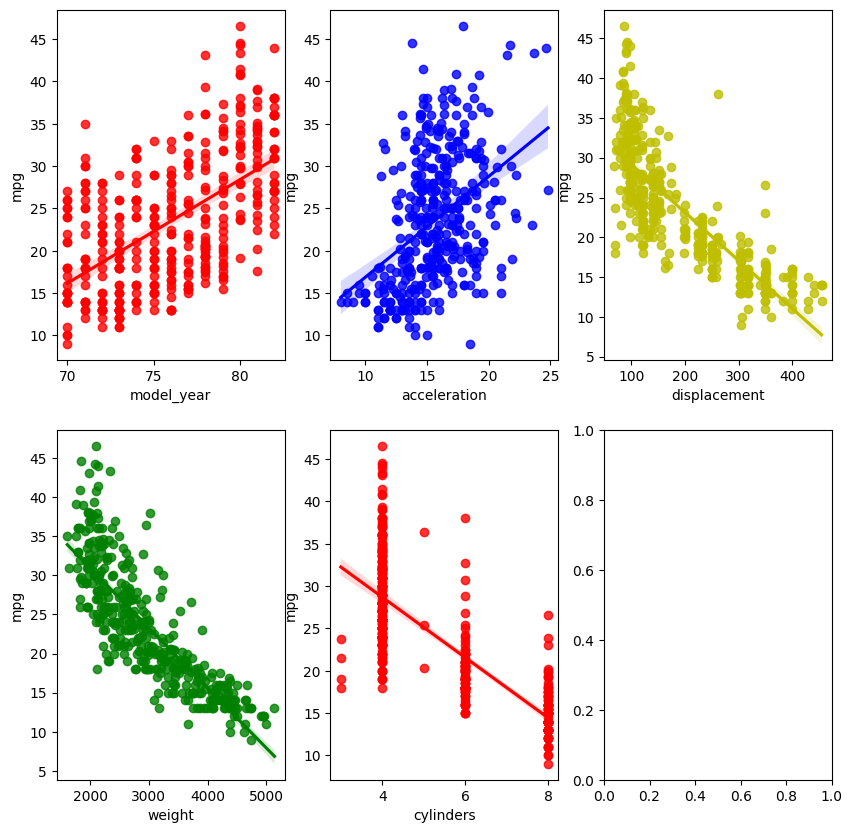

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs = plt.subplots(figsize=(10,10),ncols=3,nrows=2)
x_features=['model_year','acceleration','displacement','weight','cylinders']
plot_color =['r','b','y','g','r']
for i, feature in enumerate(x_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x=feature, y='mpg',data=data_df,ax=axs[row][col],color=plot_color[i])

##(4) 완성된 자동차 연비 예측 모델을 이용하여 연비 예측하기

* 엔진의 실린더수: 3, 4, 5, 6, 8, 10, 12
* 배기량: 소형차는 1000-1500, 중형차는 1600-2500,대형차는 2500이상
* 차량무게(파운드): 1500-6000
* 가속능력(정지상태에서 시속 60마일까지 도달하는 데 걸리는 시간): 승용차는 보통 6~12
* 제조연도: 70~99입력

In [ ]:
print('연비를 예측하고 싶은 차의 정보를 각각 입력해주세요.')

cylinders_1= int(input('엔진의 실린더수:'))
displacement_1=float(input('배기량:'))
weight_1 = int(input("차량무게(파운드):"))
acceleration_1 =float(input('가속능력:'))
model_year_1=int(input('제조연도:'))

연비를 예측하고 싶은 차의 정보를 각각 입력해주세요.
엔진의 실린더수:8
배기량:1800
차량무게(파운드):3200
가속능력:25
제조연도:99


In [ ]:
new_data = {
    'cylinders': [cylinders_1],
    'displacement': [displacement_1],
    'weight': [weight_1],
    'acceleration': [acceleration_1],
    'model_year': [model_year_1],
}
new_df = pd.DataFrame(new_data)

# 예측
mpg_predict = lr.predict(new_df)
print(f'이 자동차의 예상 연비(mpg)는 {mpg_predict[0]:.2f}입니다.')

이 자동차의 예상 연비(mpg)는 52.76입니다.
